In [1]:
library(tidyverse)
library(glue)
library(dplyr)

install.packages("showtext")
install.packages("extrafont")
library(extrafont)
font_import()


theme_rangeframe <- function(size = 0.3) {
    theme(
        axis.line = element_line(colour = "black", lineend = "round", size = size),
        axis.ticks = element_line(linewidth = size),
        panel.border = element_blank()
    )
}

scale_axis_rangeframe <- function() {
    guides(x = "axis_truncated", y = "axis_truncated")
}

rotate_x_text <- function(angle=45) {
    theme(
        axis.text.x = element_text(angle = angle, hjust = 1)
    )
}

article_text <- function() {
    theme(
        text = element_text(size = 5, family = "Helvetica"),
        title = element_text(size = 6),
        axis.text.x = element_text(size = 5),
        axis.text.y = element_text(size = 5)
    )
}

no_legend <- function() {
    theme(
        legend.position = "none"
    )
}

no_margin <- function() {
    theme(
        plot.margin = margin(0, 0, 0, 0, unit = "lines")
    )
}

no_label <- function() {
    theme(
        axis.title = element_blank()
    )
}

no_text <- function() {
    theme(
        axis.title = element_blank(),
        axis.text = element_blank(),
        axis.ticks = element_blank()
    )
}

no_x_text <- function() {
    theme(
        axis.text.x = element_blank(),
        axis.ticks.x = element_blank()
    )
}

no_y_text <- function() {
    theme(
        axis.text.y = element_blank(),
        axis.ticks.y = element_blank()
    )
}


custom_theme <- function(size = 0.3){
    theme_minimal() +
    theme(
        text = element_text(family='Helvetica'),
        axis.line = element_line(colour = "black", lineend = "round", size = size),
        axis.ticks = element_line(linewidth = size),
        panel.border = element_blank()
    )

}
theme_set(custom_theme())

article_text <- function() {
    theme(
        text = element_text(size = 5, family = "Helvetica"),
        title = element_text(size = 6),
        axis.text.x = element_text(size = 5),
        axis.text.y = element_text(size = 5)
    )
}


Warning message:
“package ‘tidyverse’ was built under R version 4.2.3”
Warning message:
“package ‘tibble’ was built under R version 4.2.3”
Warning message:
“package ‘readr’ was built under R version 4.2.3”
Warning message:
“package ‘purrr’ was built under R version 4.2.3”
Warning message:
“package ‘dplyr’ was built under R version 4.2.3”
Warning message:
“package ‘stringr’ was built under R version 4.2.3”
Warning message:
“package ‘forcats’ was built under R version 4.2.3”
Warning message:
“package ‘lubridate’ was built under R version 4.2.3”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package 

Importing fonts may take a few minutes, depending on the number of fonts and the speed of the system.
Continue? [y/n]  y


Scanning ttf files in /usr/share/fonts/ ...

Extracting .afm files from .ttf files...

/usr/share/fonts/dejavu-sans-fonts/DejaVuSans-Bold.ttf
 : DejaVuSans-Bold already registered in fonts database. Skipping.

/usr/share/fonts/dejavu-sans-fonts/DejaVuSans-BoldOblique.ttf
 : DejaVuSans-BoldOblique already registered in fonts database. Skipping.

/usr/share/fonts/dejavu-sans-fonts/DejaVuSans-ExtraLight.ttf
 : DejaVuSans-ExtraLight already registered in fonts database. Skipping.

/usr/share/fonts/dejavu-sans-fonts/DejaVuSans-Oblique.ttf
 : DejaVuSans-Oblique already registered in fonts database. Skipping.

/usr/share/fonts/dejavu-sans-fonts/DejaVuSans.ttf
 : DejaVuSans already registered in fonts database. Skipping.

/usr/share/fonts/dejavu-sans-fonts/DejaVuSansCondensed-Bold.ttf
 : DejaVuSansCondensed-Bold already registered in fonts database. Skipping.

/usr/share/fonts/dejavu-sans-fonts/DejaVuSansCondensed-BoldOblique.ttf
 : DejaVuSansCondensed-BoldOblique already registered in fonts d

In [2]:
color_dict = c(
    "CellFlow"= "#B12F8C",
    "chemCPA"= "#A2E5E7",
    "Biolord"= "#BD6DED",
    "Identity"="#BDBDBD",
    "CondOT"="#DEA1A6")

In [3]:
split_to_filter <- 5
dosage_to_filter <- "10000\\.0$"
dosage_to_filter_str <- sub("\\\\.*", "", dosage_to_filter)

In [4]:
output_dir <- glue("/lustre/groups/ml01/workspace/ot_perturbation/figures/sciplex/benchmark/plots_{split_to_filter}_{dosage_to_filter_str}")

In [5]:
output_dir

/lustre/groups/ml01/workspace/ot_perturbation/figures/sciplex/benchmark/plots_5_10000

# Decoded

In [6]:
results_decoded <- read_csv("/lustre/groups/ml01/workspace/ot_perturbation/data/sciplex/results/allocation/ood_metrics_decoded.csv") 
results_decoded <- results_decoded %>%
  filter(grepl(dosage_to_filter, variable) & split == split_to_filter)



New names:
• `` -> `...1`
Rows: 11040 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): model, metric, variable
dbl (3): ...1, value, split

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


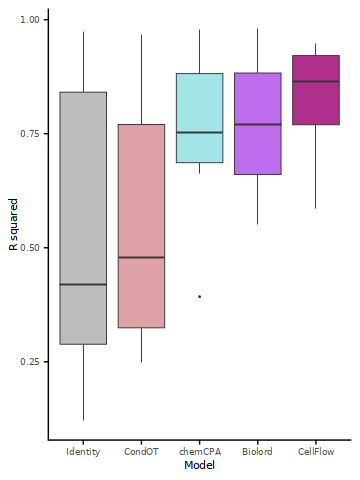

In [7]:
options(repr.plot.width = 3.0, repr.plot.height = 4.0, unit="cm")

results_decoded$model <- factor(results_decoded$model, 
                            levels = c("id", "condot", "chemCPA", "biolord", "otfm"),
                            labels = c("Identity", "CondOT", "chemCPA", "Biolord", "CellFlow"))  # Correct factorization

p <- ggplot(results_decoded, aes(x=model, y=value, fill=model)) +
  geom_boxplot(size=0.2,  width=0.8, outlier.size=0.2, outlier.shape=16) +
  labs(x="Model", y=glue("R squared")) +
  scale_fill_manual(values=color_dict) +  # Removed labels argument
  custom_theme() +
article_text() +
no_legend() +
theme(
    panel.grid.major=element_blank(), 
    panel.grid.minor=element_blank()
)
p

In [8]:
ggsave(file.path(output_dir, "ood_r_squared_decoded.pdf"), plot = p, device = "pdf", width = 3.0, height = 4.0, unit="cm")

# Encoded

In [9]:
results_encoded <- read_csv("/lustre/groups/ml01/workspace/ot_perturbation/data/sciplex/results/allocation/ood_metrics_encoded.csv") 
results_encoded <- results_encoded %>%
  filter(grepl(dosage_to_filter, variable) & split == split_to_filter)


New names:
• `` -> `...1`
Rows: 44160 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): model, metric, variable
dbl (3): ...1, value, split

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


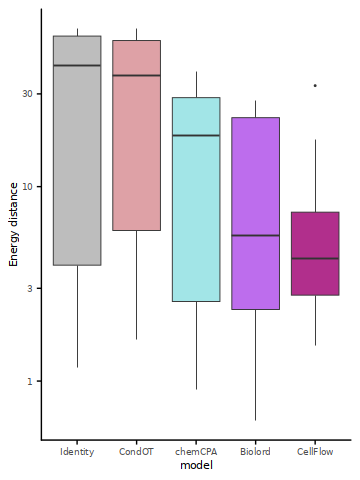

In [10]:
options(repr.plot.width = 3.0, repr.plot.height = 4.0, unit="cm")

results <- results_encoded %>% filter(metric == "e_distance")

results$model <- factor(results$model, 
                                levels = c("id", "condot", "chemCPA", "biolord", "otfm"),
                                labels = c("Identity", "CondOT", "chemCPA", "Biolord", "CellFlow"))  # Correct factorization

p <- ggplot(results, aes(x=model, y=value, fill=model)) +
  geom_boxplot(size=0.2,  width=0.8, outlier.size=0.2, outlier.shape=16) +
  labs(y="Energy distance") +
  scale_fill_manual(values=color_dict) +  # Removed labels argument
  custom_theme() +
article_text() +
no_legend() +
scale_y_log10() +
theme(
    panel.grid.major=element_blank(), 
    panel.grid.minor=element_blank()
)
p

In [11]:
ggsave(file.path(output_dir, "ood_e_distance_encoded.pdf"), plot = p, device = "pdf", width = 3.0, height = 4.0, unit="cm")

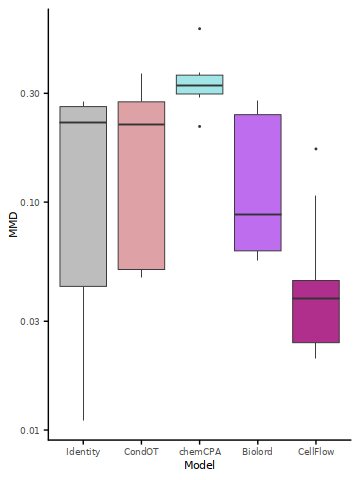

In [12]:
options(repr.plot.width = 3.0, repr.plot.height = 4.0, unit="cm")

results <- results_encoded %>% filter(metric == "mmd")

results$model <- factor(results$model, 
                                levels = c("id", "condot", "chemCPA", "biolord", "otfm"),
                                labels = c("Identity", "CondOT", "chemCPA", "Biolord", "CellFlow"))  # Correct factorization

p <- ggplot(results, aes(x=model, y=value, fill=model)) +
  geom_boxplot(size=0.2,  width=0.8, outlier.size=0.2, outlier.shape=16) +
  labs(x="Model", y="MMD") +
  scale_fill_manual(values=color_dict) +  # Removed labels argument
  custom_theme() +
article_text() +
scale_y_log10() +
no_legend() +
theme(
    panel.grid.major=element_blank(), 
    panel.grid.minor=element_blank()
)
p

In [13]:
ggsave(file.path(output_dir, "ood_mmd_distance_encoded.pdf"), plot = p, device = "pdf", width = 3.0, height = 4.0, unit="cm")

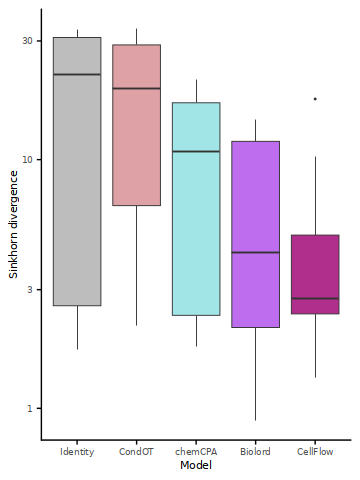

In [14]:
options(repr.plot.width = 3.0, repr.plot.height = 4.0, unit="cm")

results <- results_encoded %>% filter(metric == "sinkhorn_div")

results$model <- factor(results$model, 
                                levels = c("id", "condot", "chemCPA", "biolord", "otfm"),
                            labels = c("Identity", "CondOT", "chemCPA", "Biolord", "CellFlow"))  # Correct factorization

p <- ggplot(results, aes(x=model, y=value, fill=model)) +
  geom_boxplot(size=0.2,  width=0.8, outlier.size=0.2, outlier.shape=16) +
  labs(x="Model", y="Sinkhorn divergence") +
  scale_fill_manual(values=color_dict) +  # Removed labels argument
  custom_theme() +
article_text() +
scale_y_log10() +
no_legend() +
theme(
    panel.grid.major=element_blank(), 
    panel.grid.minor=element_blank()
)
p

In [15]:
ggsave(file.path(output_dir, "ood_sink_div_encoded.pdf"), plot = p, device = "pdf", width = 3.0, height = 4.0, unit="cm")

# DEG

In [16]:
results_deg <- read_csv("/lustre/groups/ml01/workspace/ot_perturbation/data/sciplex/results/allocation/ood_metrics_deg.csv") 
results_deg <- results_deg %>%
  filter(grepl(dosage_to_filter, variable) & split == split_to_filter)


New names:
• `` -> `...1`
Rows: 44160 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): model, metric, variable
dbl (3): ...1, value, split

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


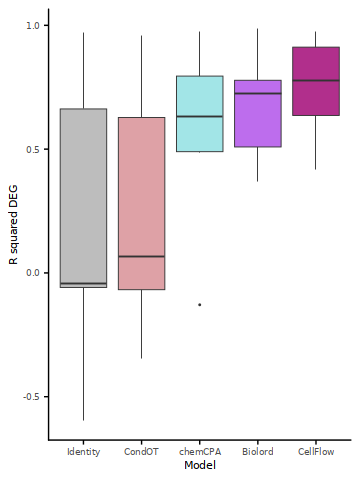

In [17]:
options(repr.plot.width = 3.0, repr.plot.height = 4.0, unit="cm")

results <- results_deg %>% filter(metric == "r_squared")


results$model <- factor(results$model, 
                                levels = c("id", "condot", "chemCPA", "biolord", "otfm"),
                            labels = c("Identity", "CondOT", "chemCPA", "Biolord", "CellFlow"))  # Correct factorization

p <- ggplot(results, aes(x=model, y=value, fill=model)) +
  geom_boxplot(size=0.2,  width=0.8, outlier.size=0.2, outlier.shape=16) +
  labs(x="Model", y="R squared DEG") +
    scale_fill_manual(values=color_dict) +
  scale_fill_manual(values=color_dict) +  # Removed labels argument
  custom_theme() +
article_text() +
no_legend() +
theme(
    panel.grid.major=element_blank(), 
    panel.grid.minor=element_blank()
)
p

In [18]:
ggsave(file.path(output_dir, "ood_r_squared_deg.pdf"), plot = p, device = "pdf", width = 3.0, height = 4.0, unit="cm")